<a href="https://colab.research.google.com/github/AmanBRajani/Episcan-AI-Models/blob/main/Both_Model_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
👉 Please upload an image to test:


Saving Screenshot 2025-04-29 084829.png to Screenshot 2025-04-29 084829.png

image 1/1 /content/Screenshot 2025-04-29 084829.png: 448x640 7 Acnes, 174.8ms
Speed: 8.8ms preprocess, 174.8ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/Screenshot 2025-04-29 084829.png: 448x640 2 dark_circles, 184.8ms
Speed: 5.1ms preprocess, 184.8ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


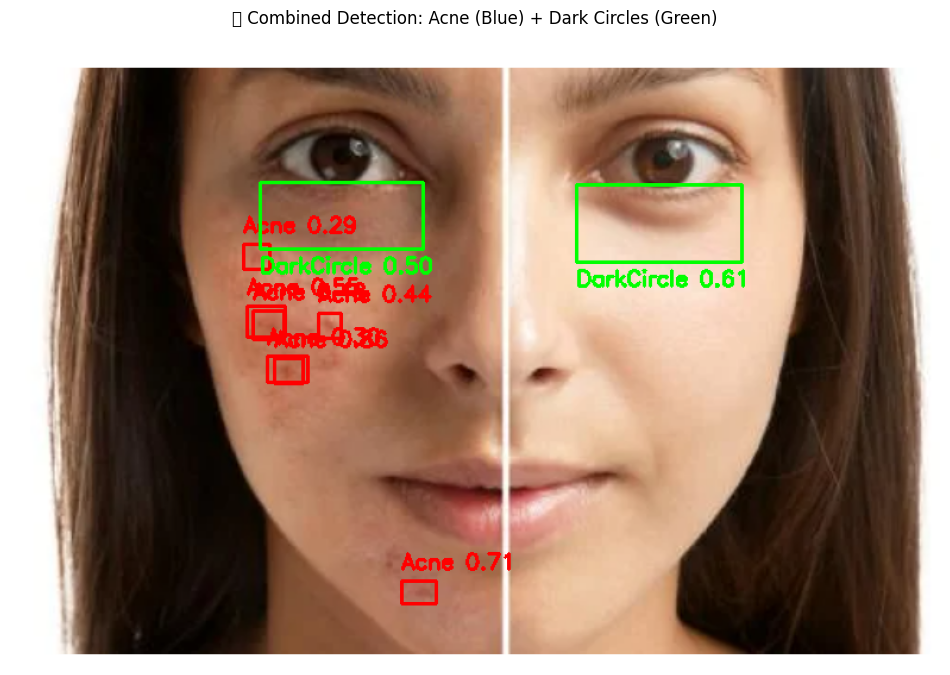

In [ ]:
# ✅ STEP 1: Install Ultralytics
!pip install ultralytics --quiet

# ✅ STEP 2: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ✅ STEP 3: Load Both Models
from ultralytics import YOLO

acne_model_path = '/content/drive/MyDrive/yolov8_highres_project/acne_darkcircle_detector/trained_weights/best.pt'
darkcircle_model_path = '/content/drive/MyDrive/yolov8_highres_project/acne_darkcircle_detector/weights/best.pt'

acne_model = YOLO(acne_model_path)
darkcircle_model = YOLO(darkcircle_model_path)

# ✅ STEP 4: Upload an Image
from google.colab import files
print("👉 Please upload an image to test:")
uploaded = files.upload()
import os
image_path = next(iter(uploaded))

# ✅ STEP 5: Run Predictions (No saving, just return results)
acne_preds = acne_model.predict(source=image_path, save=False, conf=0.25, imgsz=640)
darkcircle_preds = darkcircle_model.predict(source=image_path, save=False, conf=0.25, imgsz=640)

# ✅ STEP 6: Overlay Both Predictions on the Same Image
import cv2
import matplotlib.pyplot as plt

# Load original image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw Acne detections (Red boxes)
for box in acne_preds[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    conf = float(box.conf[0])
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(img, f'Acne {conf:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# Draw Dark Circle detections (Green boxes)
for box in darkcircle_preds[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    conf = float(box.conf[0])
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, f'DarkCircle {conf:.2f}', (x1, y2 + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# ✅ STEP 7: Show Combined Output
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.axis('off')
plt.title("🔍 Combined Detection: Acne (Blue) + Dark Circles (Green)")
plt.show()
